# Model performance figure
- This script is used to visualize model performance;
- Simulations: CNTL, WRF_LCZ, LI_LCZ, CESM_LCZ;

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cftime
import geocat.viz as gv
import string
import math
home_path = '/gws/nopw/j04/duicv/yuansun/'
output_dir = home_path + '0_lcz_sp/output_analysis/sp/anthro/data_for_figure/'  

In [2]:
df = pd.read_csv(f'{output_dir}flux_bysite.csv')[['Variable', 'Model', 'mean_sdev', 'mean_coef']]
df_flux = df.groupby(['Variable', 'Model']).mean().reset_index()
df_flux.head(2)

,Variable,Model,mean_sdev,mean_coef
0,LWup,CESM_LCZ,1.112317,0.985206
1,LWup,CNTL,1.214158,0.976296


In [26]:
df_ahf = pd.read_csv(output_dir + 'ahf.csv')
#df_flux= pd.read_csv(output_dir + 'flux.csv') # other urban heat flux variables
msites = ["AU-Pre","AU-Sur","CA-Sun","FI-Kum","FI-Tor",
          "FR-Cap","GR-HEC","JP-Yoy","KR-Jun","KR-Och",
          "MX-Esc","NL-Ams","PL-Lip","PL-Nar","SG-Tel",
          "UK-Kin","UK-Swi","US-Bal","US-Mi1","US-Mi2",
          "US-Wes"]
dot_msites = ['• ' + site for site in msites]
trop = '#ff6485'
arid = '#eb9156' #'#ffd797'
temp = '#246943' #'#aee9aa'
cold = '#a29cf7' #'#87e4e0'

sca_color = [temp, temp, temp, cold, cold, 
            temp, temp, temp, cold, cold,
            temp, temp, cold, cold, trop,
            temp, temp, cold, cold, cold,
            arid]
label_climate_color = [trop, arid, temp, cold]
label_climate = ['Tropical', 'Arid', 'Temperate', 'Cold']
#lc0 = '#083550'
#lc1 = '#006bac'
#lc2 = '#3da4e3'
#lc3 = '#6c64d4'
#lc4 = '#1a8865'
#lc5 = '#cb682c'
lc0 = '#1b9e77'
lc5 = '#d95f02'
lc4 = '#7570b3'
lc1 = '#e7298a'
lc3 = '#66a61e'
# lc0: provided
# lc5: CNTL
# lc4: wrflcz
# lc1: lilcz
# lc3: cesmlcz
lc = [lc0, lc5, lc4, lc1, lc3]
colors2 = [lc3, lc1, lc4, lc5]
colors = [lc5, lc4, lc1, lc3]
alpha = [0.2, 0.15, 0.1, 0.1]
linewidth = 2
labelcolor = '#6b6b6b'
padding = 8
pad = 1
xwidth = 1
length = 8
handletextpad = 1
model_lable = ['obs', 'def', 'wrf', 'li', 'cesm']
model_lable2 = ['def', 'wrflcz', 'lilcz', 'cesmlcz']

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

text_x = 0.175
text_y = 0.765
offset_y = 0.05

#labels = ['S-CNTL', 'S-WRF_LCZ', 'S-LI_LCZ']
labels = ['CNTL', 'WRF_LCZ', 'LI_LCZ', 'CESM_LCZ']
var_list = ['Rn', 'SWup', 'LWup', 'Qh', 'Qle', 'Qtau', 'Qahf']
var_list2 = ['$R_{n}$', '$SW_{up}$', '$LW_{up}$', '$Q_{h}$', '$Q_{le}$', '$Q_{tau}$', '$Q_{ahf}$']

labelfont = 18
# need to change RMSE values when updating data
modelname = ['Provided', 
             'RMSE CNTL: ' + str(round(rmse(df_ahf['obs'], df_ahf['def']), 1)),
             'RMSE WRF_LCZ:' + str(round(rmse(df_ahf['obs'], df_ahf['wrf']), 1)), 
             'RMSE LI_LCZ: ' + str(round(rmse(df_ahf['obs'], df_ahf['li']), 1)),
             'RMSE CESM_LCZ: ' + str(round(rmse(df_ahf['obs'], df_ahf['cesm']), 1))]
alpha = 0.5

In [19]:
std_def = float(np.std(df_ahf['def']))/float(np.std(df_ahf['obs']))
std_wrf = float(np.std(df_ahf['wrf']))/float(np.std(df_ahf['obs']))
std_li = float(np.std(df_ahf['li']))/float(np.std(df_ahf['obs']))
std_cesm = float(np.std(df_ahf['cesm']))/float(np.std(df_ahf['obs']))

coef_def = float(xr.corr(xr.DataArray(df_ahf['def'].values), xr.DataArray(df_ahf['obs'].values)))
coef_wrf = float(xr.corr(xr.DataArray(df_ahf['wrf'].values), xr.DataArray(df_ahf['obs'].values)))
coef_li = float(xr.corr(xr.DataArray(df_ahf['li'].values), xr.DataArray(df_ahf['obs'].values)))
coef_cesm = float(xr.corr(xr.DataArray(df_ahf['cesm'].values), xr.DataArray(df_ahf['obs'].values)))

result3 = pd.concat([df_flux, pd.DataFrame([{'Variable': 'Qahf', 'Model': 'CNTL', 'mean_sdev': std_def, 'mean_coef': coef_def},
                                          {'Variable': 'Qahf', 'Model': 'WRF_LCZ', 'mean_sdev': std_wrf, 'mean_coef': coef_wrf},
                                          {'Variable': 'Qahf', 'Model': 'LI_LCZ', 'mean_sdev': std_li, 'mean_coef': coef_li},
                                          {'Variable': 'Qahf', 'Model': 'CESM_LCZ', 'mean_sdev': std_cesm, 'mean_coef': coef_cesm} ])], ignore_index=True)     

model_order = ['CNTL', 'WRF_LCZ', 'LI_LCZ', 'CESM_LCZ']
result3['Model'] = pd.Categorical(result3['Model'], categories=model_order, ordered=True)
stddev = result3.pivot(index='Model', columns='Variable', values='mean_sdev')
stddev = stddev[var_list].to_numpy()
corrcoef = result3.pivot(index='Model', columns='Variable', values='mean_coef')
corrcoef= corrcoef[var_list].to_numpy()    

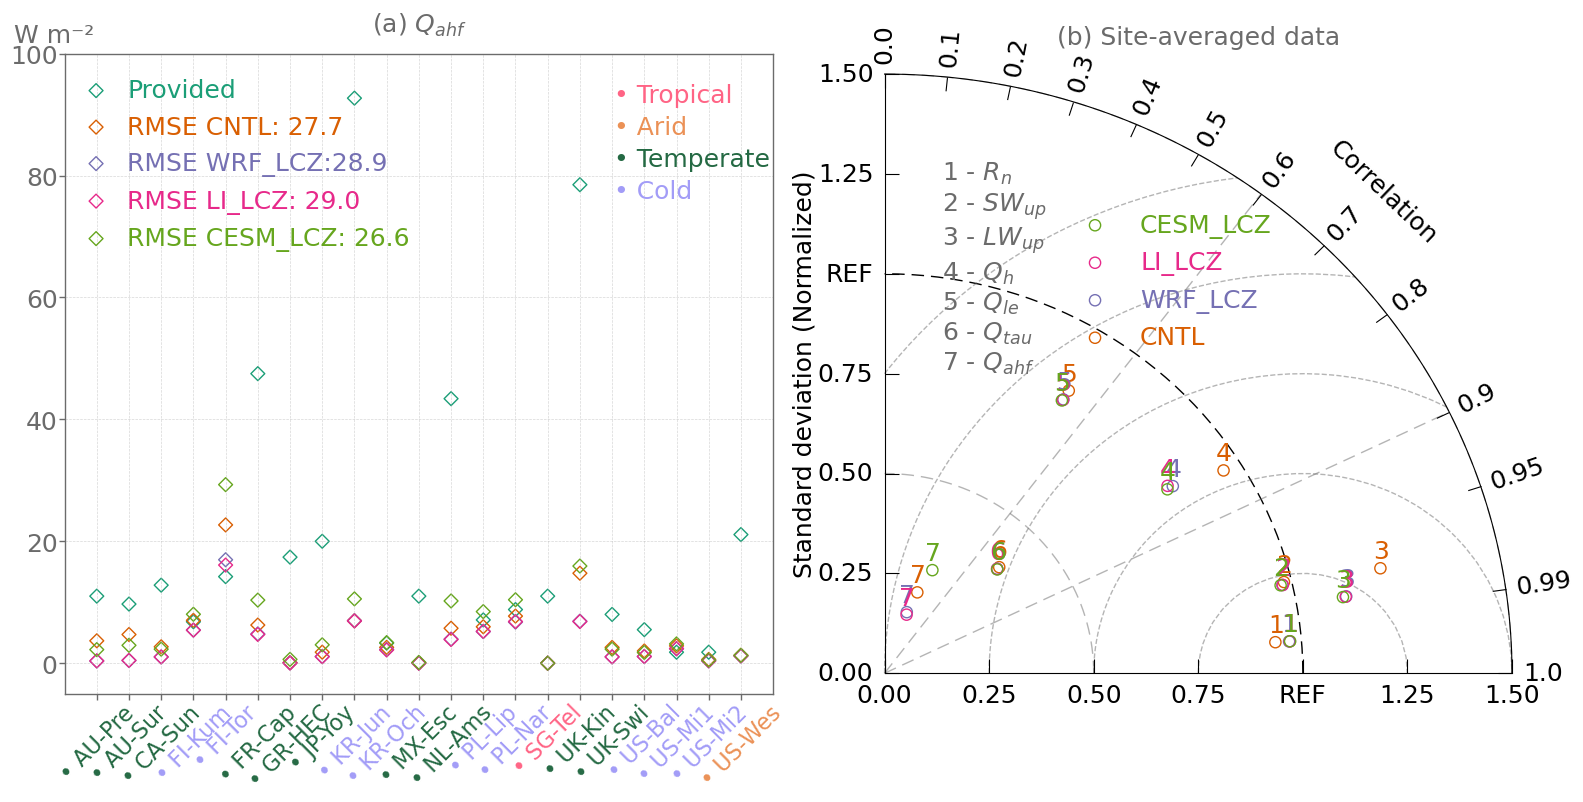

In [37]:
fig = plt.figure(figsize=(16,8))
# ahf
ax1 = fig.add_subplot(1, 2, 1)
for i in range(5):
    ax1.scatter(dot_msites, df_ahf[model_lable[i]], color = lc[i], marker='D', facecolors='none', 
                s=50, label= modelname[i])

ax1.set_title('(a) $Q_{ahf}$',
              fontsize=labelfont,color=labelcolor, pad = padding*2)
ax1.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,
                labelsize=labelfont,pad=pad, width = xwidth, length = length/2)
ax1.tick_params(axis='x', which='both', rotation=45, top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,
                labelsize=labelfont-2,pad=pad, width = xwidth, length = length/2)
tick_labels = ax1.get_xticklabels()
tick_lines = ax1.get_xticklines()
# idenfiy the background climate for each sites
for tick, color in zip(tick_labels, sca_color):
    tick.set_color(color)

for tick, color in zip(tick_lines[0::2], sca_color):
    tick.set_color(color)

for c, climate in enumerate(label_climate):    
    ax1.text(0.775, 0.925 - 0.05 * c, '• ' + climate, color=label_climate_color[c], fontsize=labelfont, transform=ax1.transAxes)

ax1.spines['top'].set_color(labelcolor)
ax1.spines['right'].set_color(labelcolor)
ax1.spines['bottom'].set_color(labelcolor)
ax1.spines['left'].set_color(labelcolor)
ax1.spines['top'].set_linewidth(xwidth)
ax1.spines['right'].set_linewidth(xwidth)
ax1.spines['bottom'].set_linewidth(xwidth)
ax1.spines['left'].set_linewidth(xwidth)
ax1.set_ylim(-5, 100)
ax1.set_ylabel('W m⁻²', labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
ax1.yaxis.set_label_coords(-0.015, 1.01)
plt.grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
plt.grid(True) 

lines1, label1 = ax1.get_legend_handles_labels()
legend = fig.legend(lines1, label1, bbox_to_anchor=(0.025, 0.65), loc='lower left', frameon=False, 
                    handletextpad=handletextpad/4, fontsize=labelfont, ncol=1)
for i, text in enumerate(legend.get_texts()):
        text.set_color(lc[i])

ax2 = fig.add_subplot(1,2,2)

da = gv.TaylorDiagram(refstd=1, fig=fig,  rect=122,label='REF', std_range=(0, 1.5))
for j in range(4):
    model = labels[j]
    da.add_model_set(stddev[j],
                         corrcoef[j],
                         #xytext=(-11, 25), # marker label location, in pixels
                         xytext=(-7.5, 10),
                         fontsize=labelfont,
                         color=colors[j],
                         label=labels[j],
                         marker='o', 
                         facecolors='none',
                         s=65,
                    annotate_on=True)
    
da.add_title('(b) Site-averaged data', y_loc = 1.025, fontsize=labelfont, color=labelcolor)

legend2 = da.add_legend(xloc=0.65, yloc=0.8, fontsize=labelfont)

for i, text in enumerate(legend2.get_texts()):
        text.set_color(colors2[i])

da.set_fontsizes_and_pad(ticklabel_fontsize=labelfont, axislabel_fontsize=labelfont, axislabel_pad=pad)
da.add_model_name(var_list2, x_loc = 0.1, y_loc = 0.85, fontsize=labelfont, **{'color':labelcolor}) # add 1-6 label
da.add_std_grid(np.array([0.5, 1.5]), color=labelcolor, linewidth=xwidth, alpha = alpha)
da.add_corr_grid(np.array([0.6, 0.9]), color=labelcolor,linewidth=xwidth, alpha = alpha)
#kwargs = {'linestyles': '--'}
# kwargs = {'linestyle': '--'} does not work, should be pl
da.add_contours(levels=np.arange(0, 1.5, 0.25), colors=labelcolor, linewidths=xwidth, alpha = alpha, **{'linestyles': '--'}) 
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])

plt.subplots_adjust(left=0.035, right=0.965, bottom=0.125, top=0.925, wspace=0.1)
fig.savefig('ahf.png', dpi=300) 
fig.savefig('ahf.pdf', dpi=600) 

# Result description

## Anthropogenic heat flux

In [13]:
# describe KR-Jungnang ahf
df_ahf_KR_Jungnang = df_ahf[df_ahf['site'] == 'KR-Jungnang']

In [14]:
df_ahf_KR_Jungnang

,site,obs,def,wrf,li,base
8,KR-Jungnang,92.7,6.959473,6.971582,6.927211,10.547965
